In [1]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import KFold



import matplotlib.pyplot as plt; 
import pandas as pd
plt.rcdefaults()
%matplotlib inline

import PIL
import glob
import scikitplot as skplt

In [2]:
def rmse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    err = math.sqrt(err)
    return err

In [3]:
input_names = ["Band 1_11", "Band 1_12", "Band 1_13", 
               "Band 1_21", "Band 1_22", "Band 1_23",
               "Band 1_31", "Band 1_32", "Band 1_33",
               
               
               "Band 2_11", "Band 2_12", "Band 2_13", 
               "Band 2_21", "Band 2_22", "Band 2_23",
               "Band 2_31", "Band 2_32", "Band 2_33",
               
               "Band 3_11", "Band 3_12", "Band 3_13", 
               "Band 3_21", "Band 3_22", "Band 3_23",
               "Band 3_31", "Band 3_32", "Band 3_33",
               
               "Band 4_11", "Band 4_12", "Band 4_13", 
               "Band 4_21", "Band 4_22", "Band 4_23",
               "Band 4_31", "Band 4_32", "Band 4_33",
               
               "Band 6_11", "Band 6_12", "Band 6_13", 
               "Band 6_21", "Band 6_22", "Band 6_23",
               "Band 6_31", "Band 6_32", "Band 6_33",
               
               
               "MRH_11", "MRH_12", "MRH_13", 
               "MRH_21", "MRH_22", "MRH_23",
               "MRH_31", "MRH_32", "MRH_33",
               
               "MSH_11", "MSH_12", "MSH_13", 
               "MSH_21", "MSH_22", "MSH_23",
               "MSH_31", "MSH_32", "MSH_33",
               
               "MTE_11", "MTE_12", "MTE_13", 
               "MTE_21", "MTE_22", "MTE_23",
               "MTE_31", "MTE_32", "MTE_33",
               
               "MVI_11", "MVI_12", "MVI_13", 
               "MVI_21", "MVI_22", "MVI_23",
               "MVI_31", "MVI_32", "MVI_33"]

X_names = np.asarray(input_names)

In [4]:
folder = "../satyam_rad_sat_mod_npy/"
Sa1_files_all = glob.glob("../satyam_rad_sat_mod_npy/sa1_npy/*.npy")
Sa1_files_all

['../satyam_rad_sat_mod_npy/sa1_npy/sat.2017030620.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010216.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017030920.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010218.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017030919.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010219.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017031318.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010220.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017031319.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012116.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017031320.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012118.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017032119.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012119.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017032716.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012120.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017032718.npy',
 '../satyam_rad_sat_mod_npy/sa1

In [5]:
# Test Train Split for Files
import random
import math
SEED = 42
random.seed(SEED)
random.shuffle(Sa1_files_all)

Sa1_files_all.sort()

size_Sa1 = len(Sa1_files_all)

Sa1_files_train_size = math.ceil(size_Sa1*.75)
Sa1_files_test_size = size_Sa1 - Sa1_files_train_size

Sa1_files_train = Sa1_files_all[:Sa1_files_train_size]
Sa1_files_test = Sa1_files_all[Sa1_files_train_size:]

In [6]:
np.size(Sa1_files_test)

87

In [7]:
Sa1_files_test
Sa1_files_test = np.array(Sa1_files_test)
Sa1_files_test

array(['../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072020.npy',
       '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072116.npy',
       '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072118.npy',
       '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072119.npy',
       '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072120.npy',
       '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072519.npy',
       '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072520.npy',
       '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017080916.npy',
       '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017080918.npy',
       '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017080919.npy',
       '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017080920.npy',
       '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081616.npy',
       '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081618.npy',
       '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081619.npy',
       '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081620.npy',
       '../satyam_rad_sat_mod_npy/sa1_npy/sat.201708181

In [8]:
# Predicting using testing set only
X_test = []
y_test = []

# Extracting training images only
for filename in Sa1_files_test:
    filename = filename.split('/')[-1]
    
    # Satellite 1
    Sa_1_File = folder + "sa1_npy/" + filename;
    Sa1arr = np.load(Sa_1_File)
    
    
    # Satellite 2
    Sa_2_File = folder + "sa2_npy/" + filename;
    Sa2arr = np.load(Sa_2_File)
    
    
    # Satellite 3
    Sa_3_File = folder + "sa3_npy/" + filename;
    Sa3arr = np.load(Sa_3_File)
    
    # Satellite 4
    Sa_4_File = folder + "sa4_npy/" + filename;
    Sa4arr = np.load(Sa_4_File)
    
    # Satellite 6
    Sa_6_File = folder + "sa6_npy/" + filename;
    Sa6arr = np.load(Sa_6_File)
    
    
    # Model Data has wrong orientation relative to the satellite
    # Thus using flipud
    
    # MRH
    MRH_File = folder + "mrh_npy/" + filename.replace('sat', "mod", 1)
    MRHarr = np.flipud(np.load(MRH_File))
    
    # MSH
    MSH_File = folder + "msh_npy/" + filename.replace('sat', "mod", 1)
    MSHarr = np.flipud(np.load(MSH_File))
    
    # MTE
    MTE_File = folder + "tem_npy/" + filename.replace('sat', "mod", 1)
    MTEarr = np.flipud(np.load(MTE_File))
    
    # MVI
    MVI_File = folder + "vis_npy/" + filename.replace('sat', "mod", 1)
    MVIarr = np.flipud(np.load(MVI_File))
    
    # Radar Data has wrong orientation relative to the satellite
    # Thus using flipud
    
    # Radar
    Radar_File = folder + "rad_npy/" + filename.replace('sat', "rad", 1)
    Radararr = np.flipud(np.load(Radar_File))
    
    rows = len(Sa1arr);
    cols = len(Sa1arr[0]);
    
    for row in range(1, rows-1):
        for col in range(1, cols-1):
            x = [];
            
            # Sa1
            for row_ in range(row-1, row+2):
                for col_ in range(col-1, col+2):
                    x.append(Sa1arr[row_][col_])
                    
            # Sa2
            for row_ in range(row-1, row+2):
                for col_ in range(col-1, col+2):
                    x.append(Sa2arr[row_][col_])
                    
                    
            # Sa3
            for row_ in range(row-1, row+2):
                for col_ in range(col-1, col+2):
                    x.append(Sa3arr[row_][col_])
                    
            # Sa4
            for row_ in range(row-1, row+2):
                for col_ in range(col-1, col+2):
                    x.append(Sa4arr[row_][col_])
                    
            # Sa6
            for row_ in range(row-1, row+2):
                for col_ in range(col-1, col+2):
                    x.append(Sa6arr[row_][col_])
                    
                    
                    
                    
            # MRH
            for row_ in range(row-1, row+2):
                for col_ in range(col-1, col+2):
                    x.append(MRHarr[row_][col_])    
                    
            # MSH
            for row_ in range(row-1, row+2):
                for col_ in range(col-1, col+2):
                    x.append(MSHarr[row_][col_])
                    
                    
            # MTE
            for row_ in range(row-1, row+2):
                for col_ in range(col-1, col+2):
                    x.append(MTEarr[row_][col_])
                    
                    
            # MVI
            for row_ in range(row-1, row+2):
                for col_ in range(col-1, col+2):
                    x.append(MVIarr[row_][col_])
                    
            # clip 0
            x = np.array(x)
            x[x < 0] = 0
            x = x.tolist()
                    
                    
            y_test.append(Radararr[row][col])        
            X_test.append(x)

In [9]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [10]:
print(X_test.shape)
print(np.std(X_test))
print(np.min(X_test))
print(np.mean(X_test))
print(np.max(X_test))

(5612892, 81)
8176.984285805736
0.0
8339.099977468662
28149.841796875


In [11]:
print(y_test.shape)
print(np.std(y_test))
print(np.min(y_test))
print(np.mean(y_test))
print(np.max(y_test))

(5612892,)
16.785265011098023
0
18.78148555147685
893


In [12]:
import pickle
# Load Model Data
filename = "MODEL_OUT_Final_Random_Forest_3x3_npy_SA_MOD.sav"
loaded_model = pickle.load(open(filename, 'rb'))

In [13]:
X_test[0:3].shape

(3, 81)

In [14]:
X_test.shape

(5612892, 81)

In [15]:
X_test[0:121].shape

(121, 81)

In [16]:
i = 0
X_test[65536*i:65536*(i+1)].shape

(65536, 81)

In [17]:
int(X_test.shape[0]/64516)

87

../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072020.npy


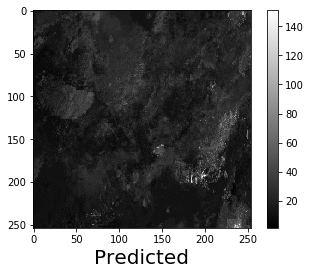

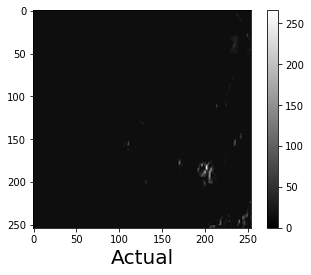

RMSE:  12.171734598332575



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072116.npy


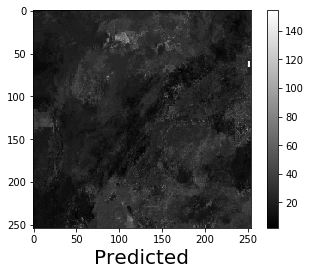

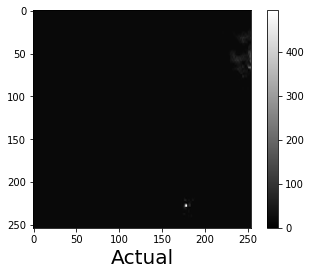

RMSE:  12.06275107178818



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072118.npy


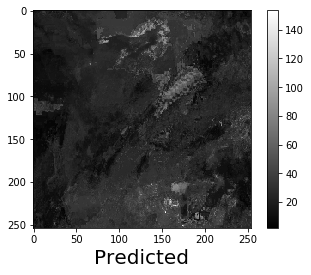

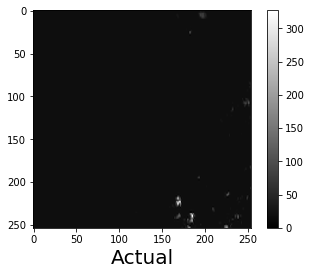

RMSE:  14.493862500696643



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072119.npy


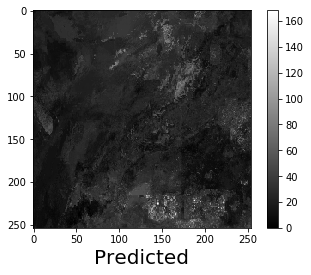

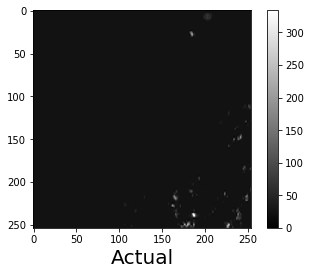

RMSE:  13.299806224892572



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072120.npy


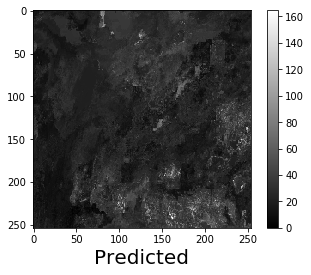

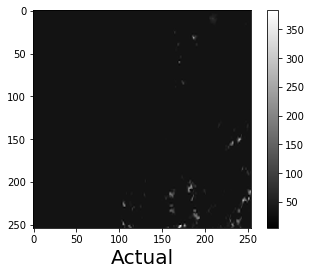

RMSE:  16.372461393907276



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072519.npy


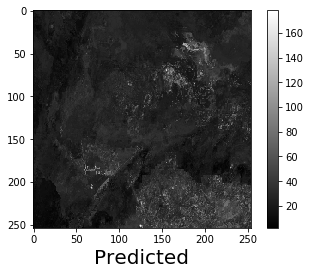

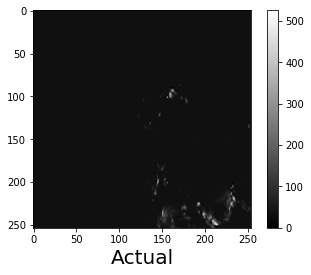

RMSE:  18.475052120091615



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072520.npy


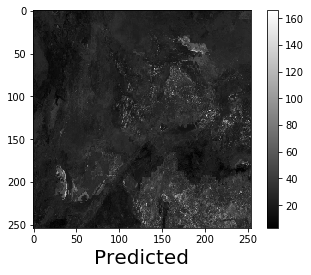

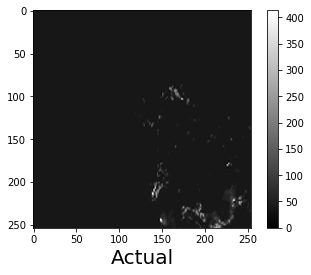

RMSE:  19.492723027004256



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017080916.npy


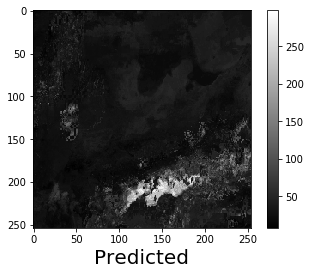

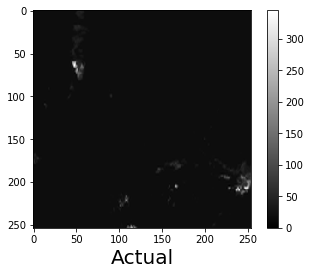

RMSE:  36.277010815846275



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017080918.npy


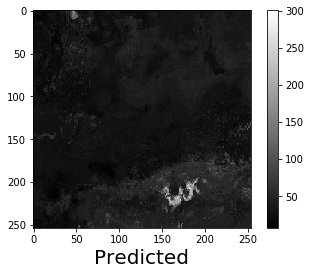

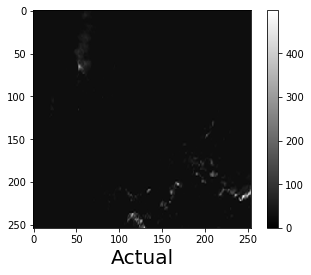

RMSE:  21.550588396160332



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017080919.npy


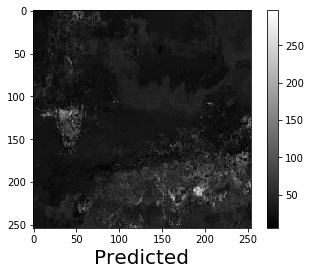

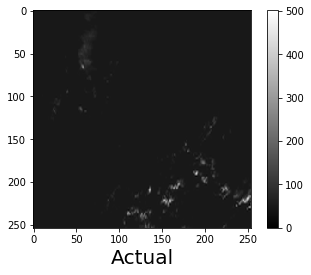

RMSE:  25.868470990775293



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017080920.npy


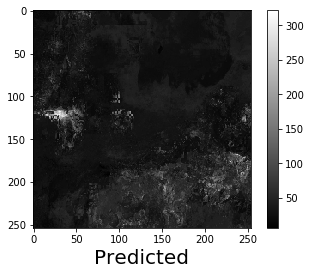

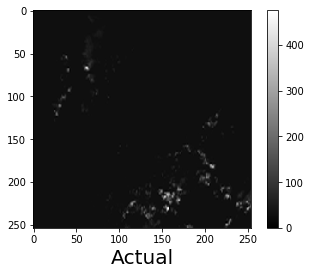

RMSE:  27.4606271357208



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081616.npy


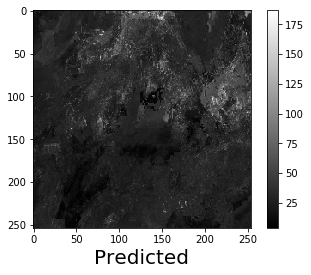

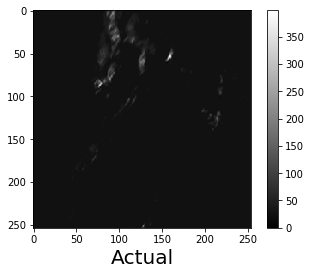

RMSE:  17.86522045909885



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081618.npy


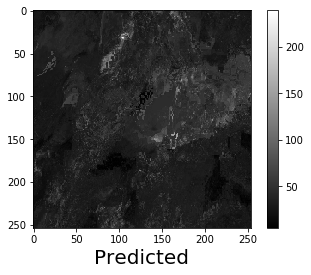

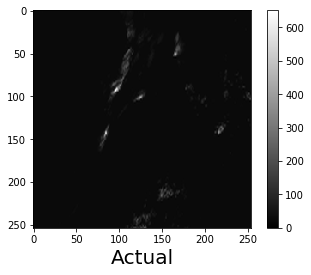

RMSE:  24.795011979029937



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081619.npy


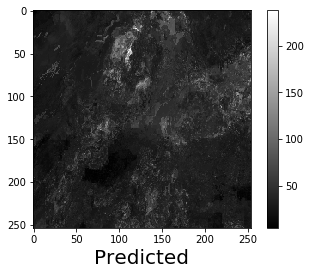

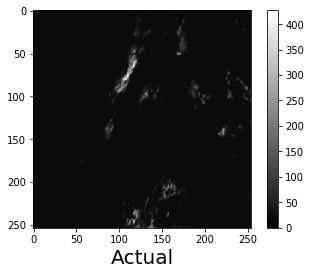

RMSE:  29.270221946575425



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081620.npy


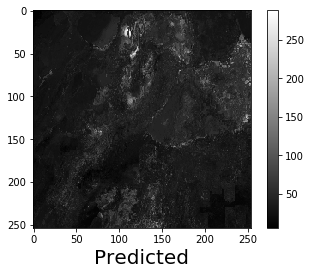

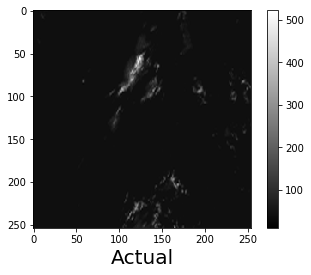

RMSE:  27.39609262744931



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081818.npy


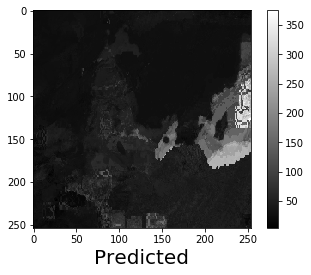

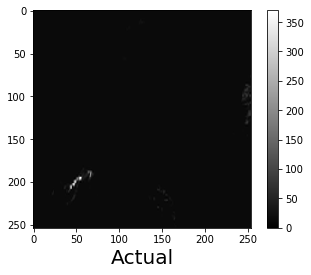

RMSE:  56.2791957284905



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081819.npy


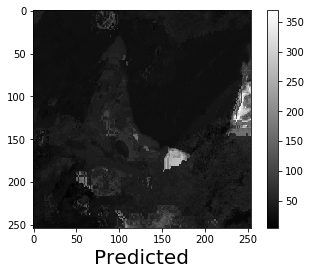

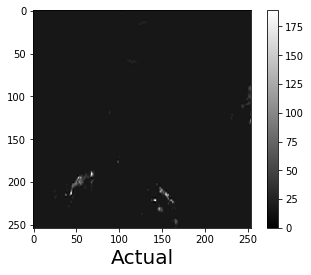

RMSE:  40.199974226370536



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081820.npy


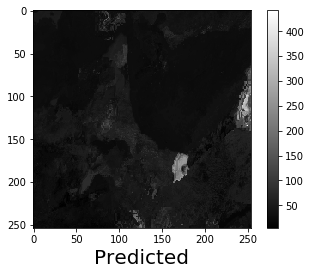

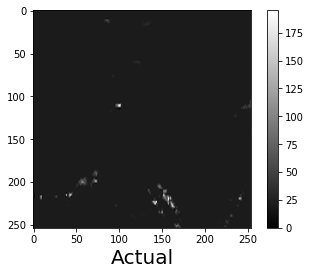

RMSE:  32.90008911092381



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082216.npy


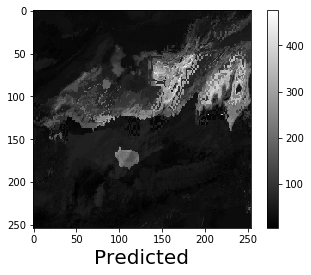

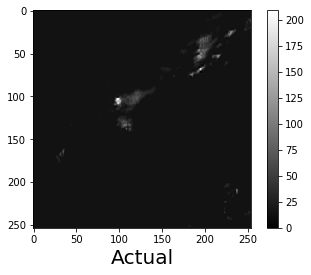

RMSE:  88.74511235022993



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082218.npy


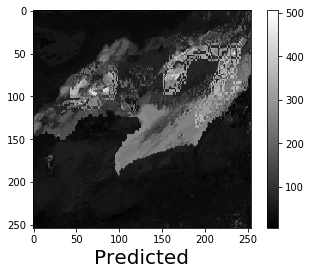

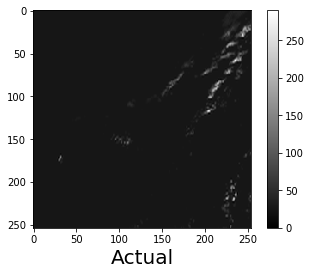

RMSE:  103.51662216543839



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082219.npy


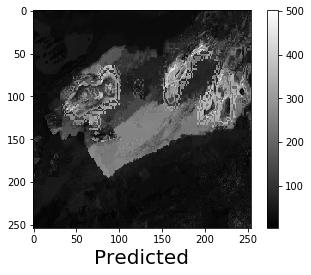

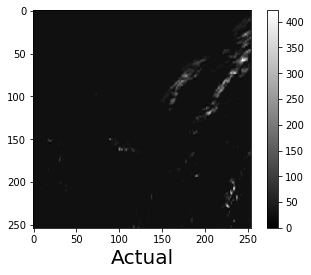

RMSE:  110.08173994833993



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082220.npy


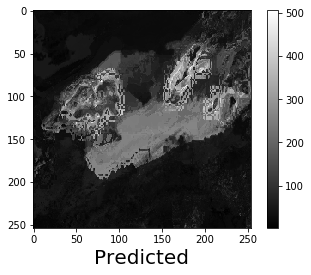

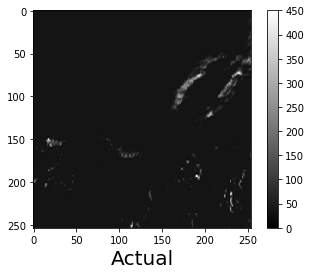

RMSE:  102.75472377590005



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082316.npy


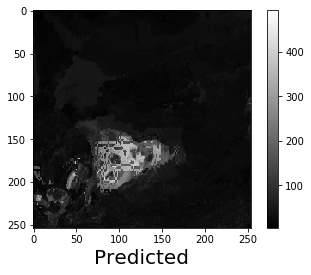

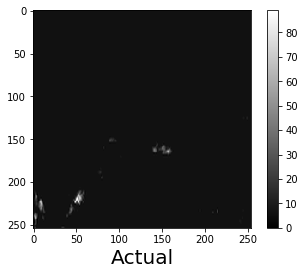

RMSE:  63.96733950568873



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082318.npy


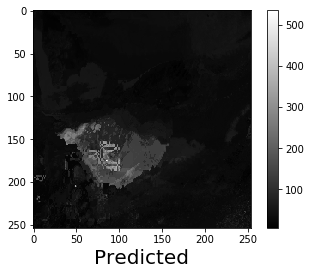

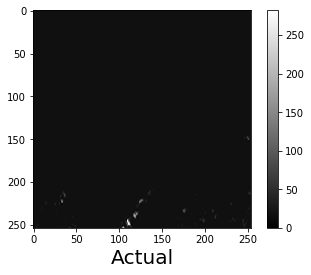

RMSE:  46.89653214305355



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082319.npy


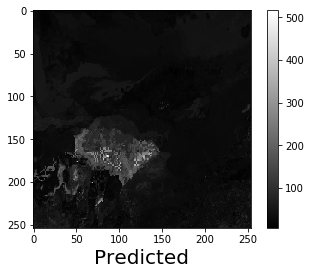

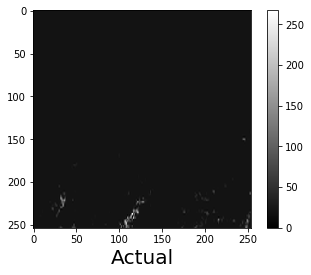

RMSE:  39.70339273568179



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082320.npy


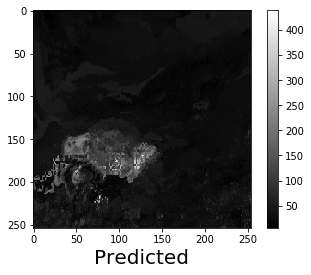

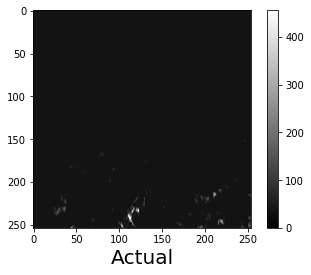

RMSE:  35.069212698667165



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082416.npy


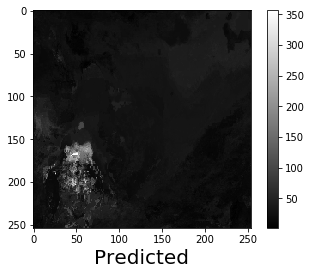

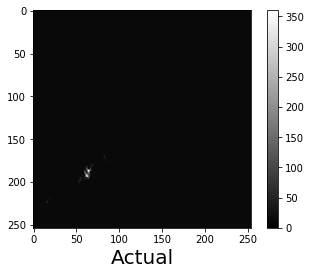

RMSE:  27.99635201274359



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082418.npy


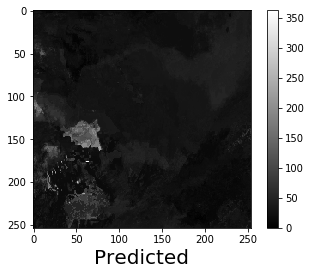

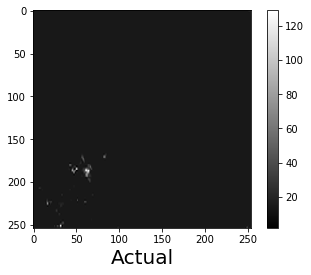

RMSE:  27.6333910252361



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082419.npy


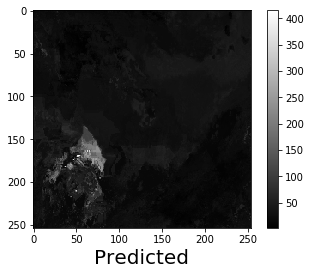

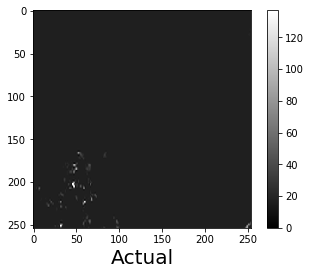

RMSE:  27.538224253346293



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082420.npy


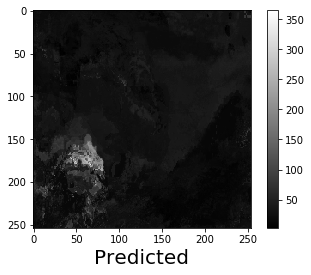

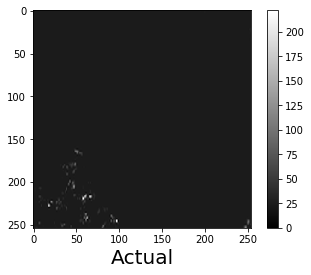

RMSE:  22.701186851413055



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082516.npy


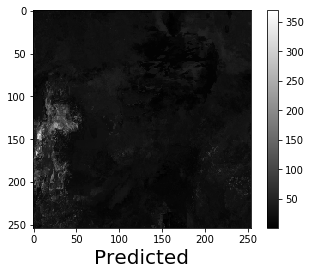

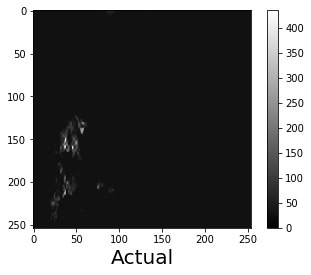

RMSE:  22.25369995729527



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082518.npy


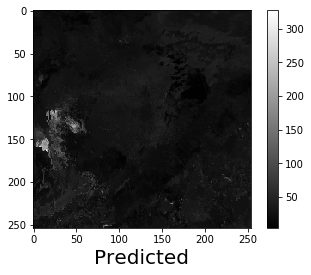

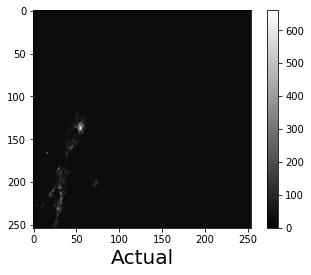

RMSE:  19.443344773786016



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082519.npy


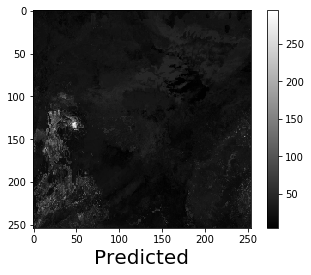

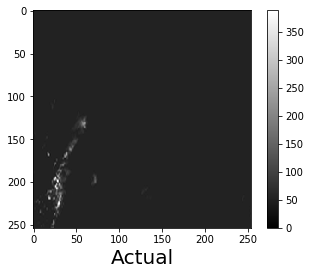

RMSE:  29.84521035020798



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082520.npy


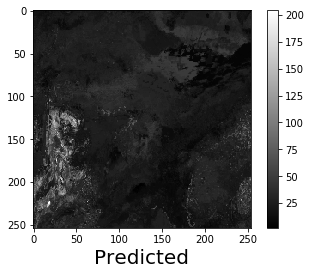

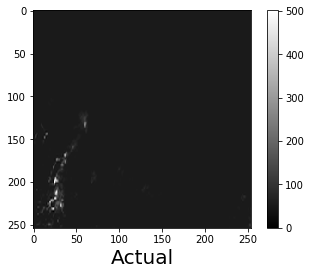

RMSE:  30.766634315302902



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082616.npy


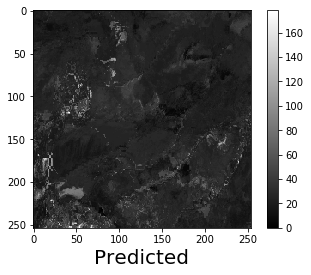

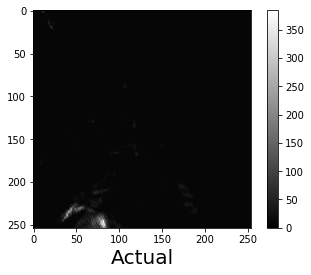

RMSE:  22.574447357052776



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082618.npy


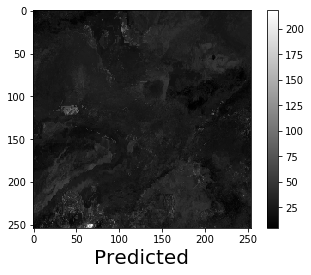

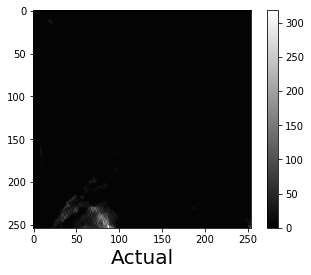

RMSE:  26.004119289805608



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082619.npy


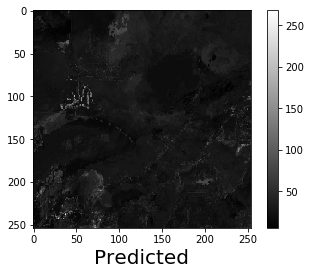

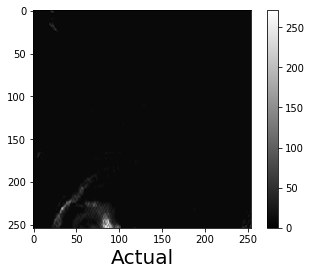

RMSE:  22.916209968826838



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082620.npy


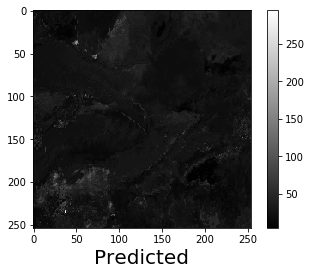

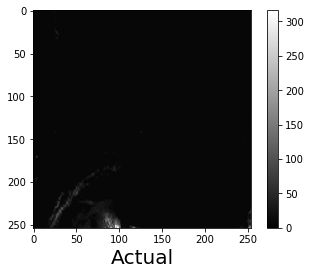

RMSE:  21.680773383273692



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017090116.npy


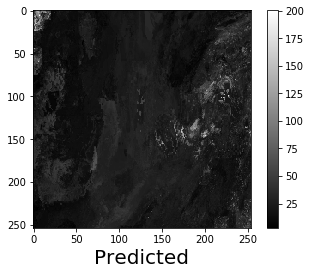

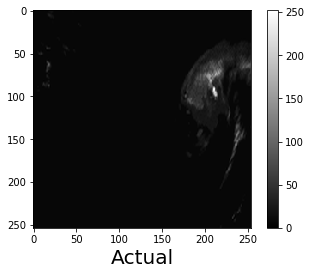

RMSE:  21.838558538403536



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017090118.npy


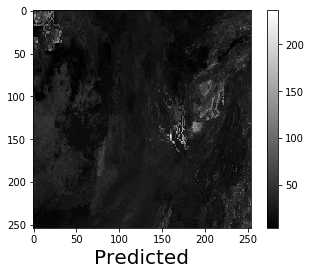

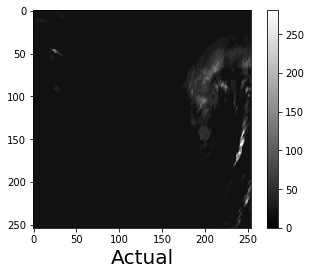

RMSE:  19.060909829453763



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017090119.npy


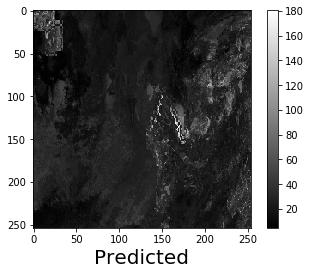

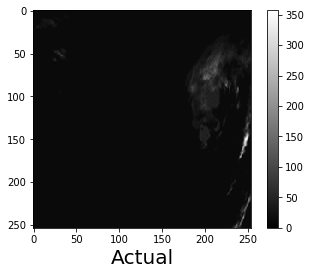

RMSE:  19.870926602386916



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017090120.npy


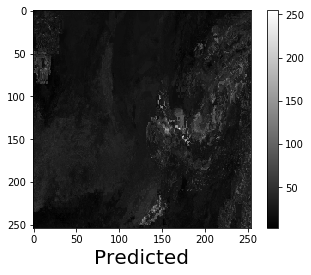

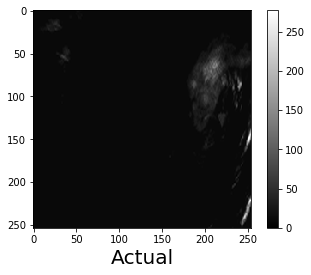

RMSE:  23.223196806721933



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017090416.npy


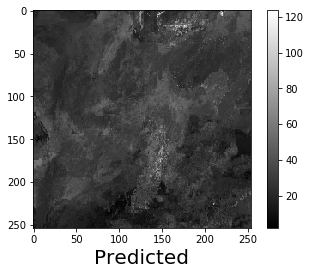

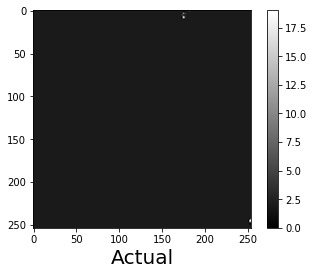

RMSE:  29.046792295575173



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017090418.npy


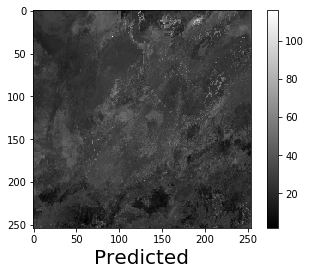

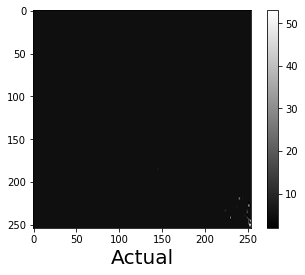

RMSE:  24.74690412765863



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017090419.npy


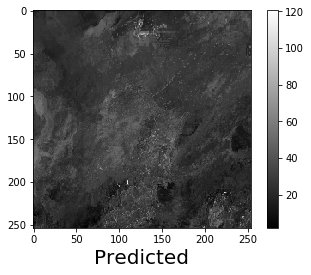

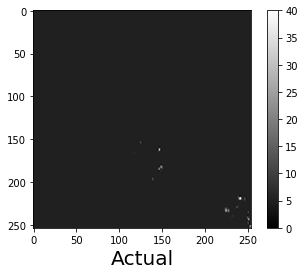

RMSE:  25.39767018051658



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017090420.npy


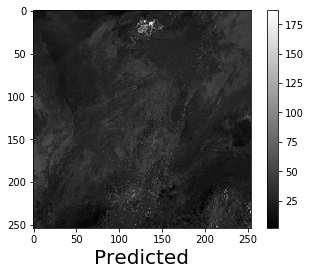

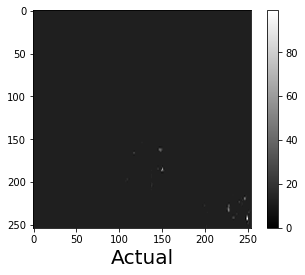

RMSE:  21.465422904377192



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017090518.npy


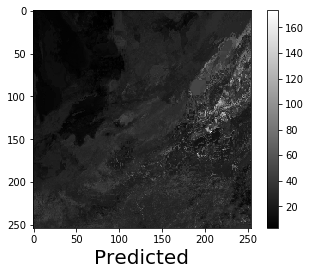

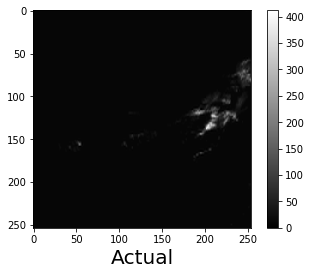

RMSE:  22.122559697293056



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017090519.npy


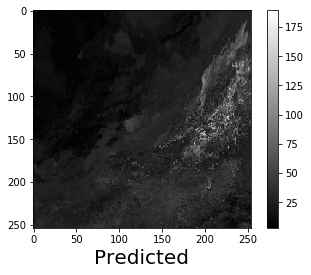

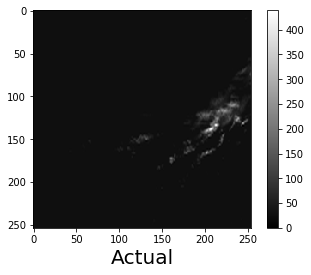

RMSE:  19.31457878613736



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017090520.npy


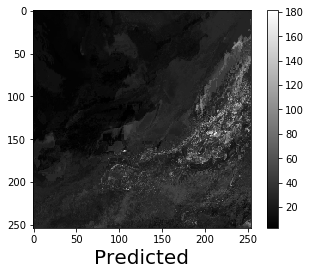

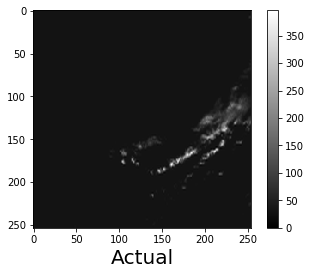

RMSE:  22.36173383459521



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017090819.npy


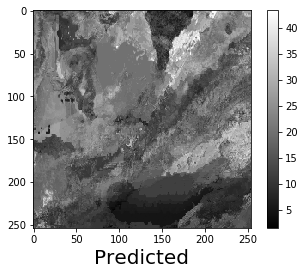

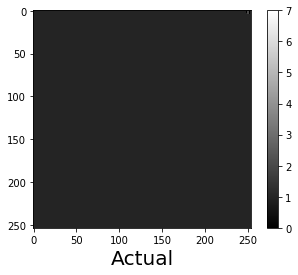

RMSE:  18.608635296082706



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017090820.npy


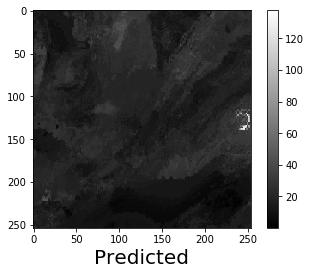

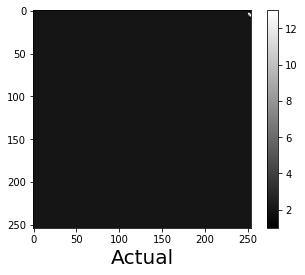

RMSE:  18.2944752302614



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017090916.npy


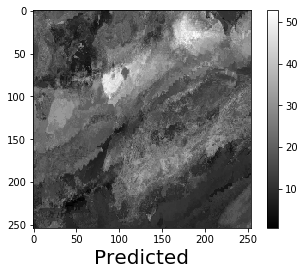

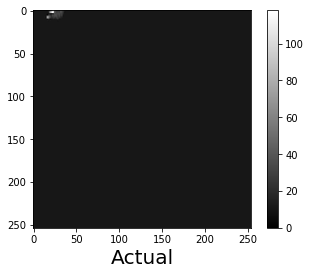

RMSE:  11.383738128092528



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017090918.npy


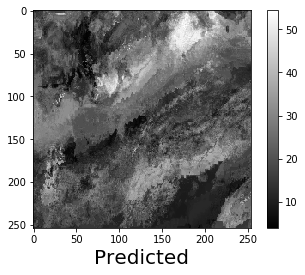

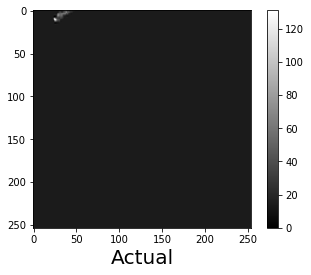

RMSE:  11.620940488080802



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017090919.npy


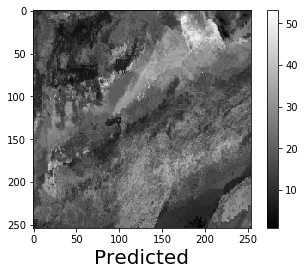

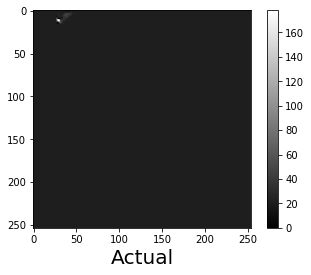

RMSE:  7.693245848279084



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017090920.npy


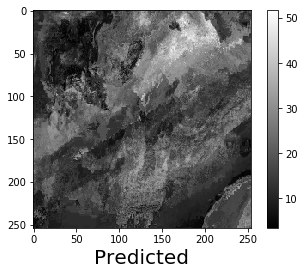

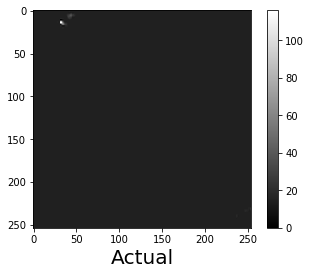

RMSE:  8.49489524605751



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017091016.npy


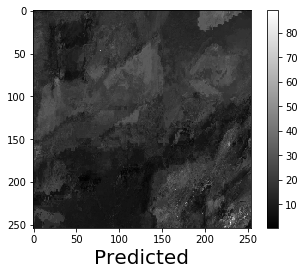

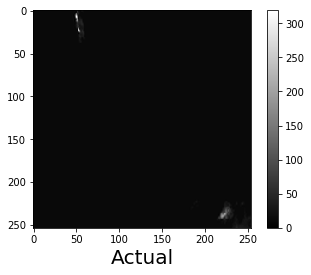

RMSE:  10.127216413014217



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017091018.npy


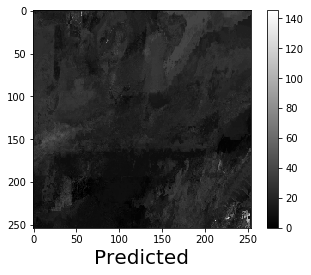

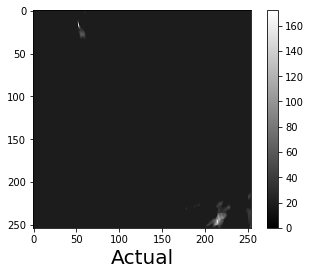

RMSE:  9.165711309578086



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017091019.npy


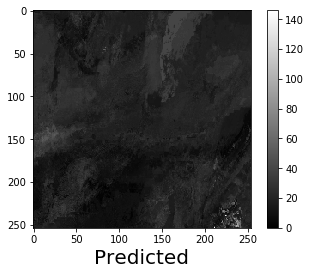

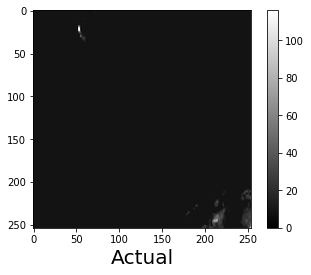

RMSE:  13.137182388211036



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017091020.npy


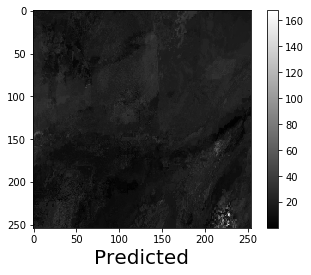

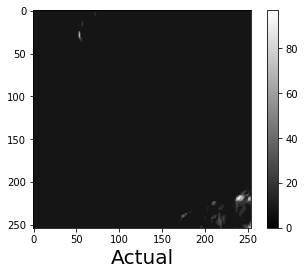

RMSE:  12.557897146280562



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017091116.npy


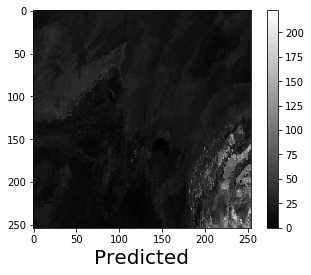

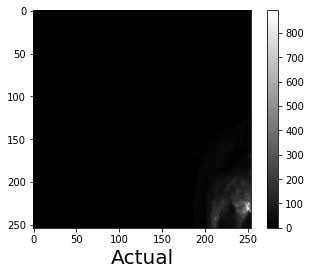

RMSE:  31.98698503851877



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017091119.npy


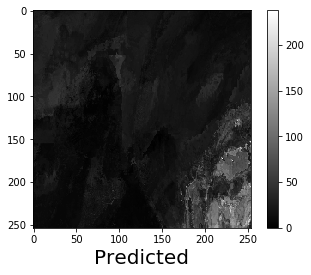

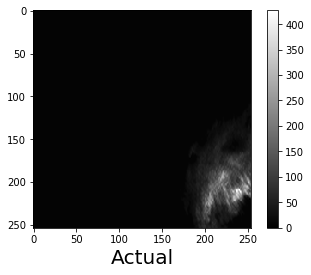

RMSE:  28.751705432654436



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017091120.npy


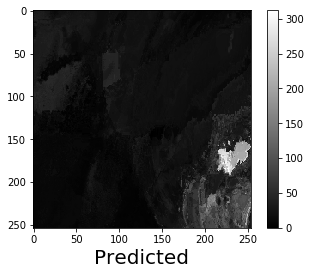

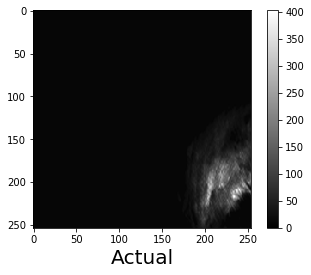

RMSE:  31.174312658028878



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017091918.npy


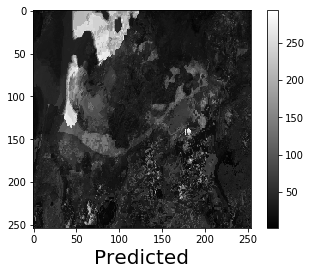

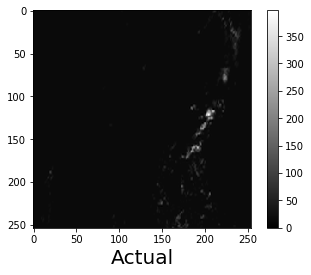

RMSE:  60.085890117467535



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017091919.npy


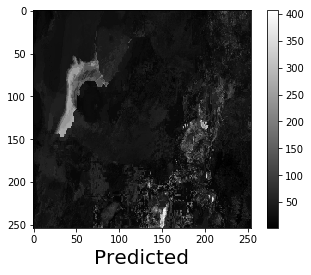

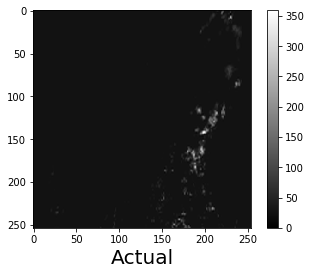

RMSE:  41.206461997907816



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017091920.npy


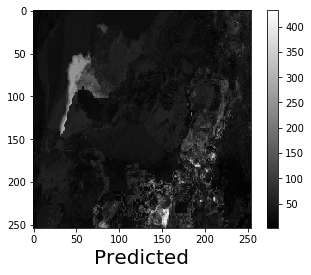

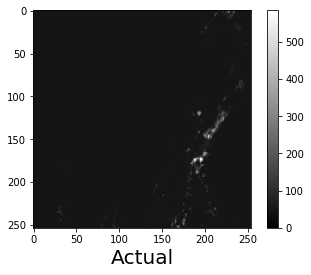

RMSE:  39.69445019494227



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017092318.npy


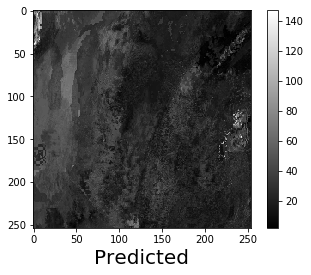

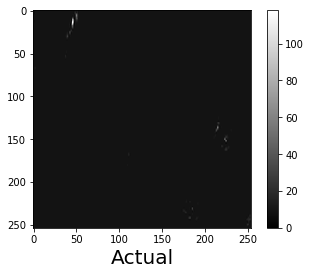

RMSE:  23.904943363091963



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017092319.npy


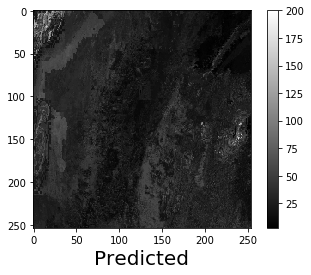

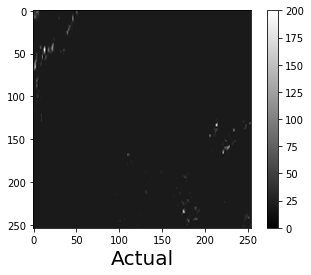

RMSE:  16.702713612203375



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017092320.npy


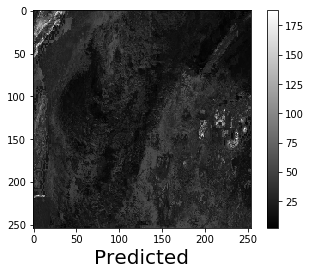

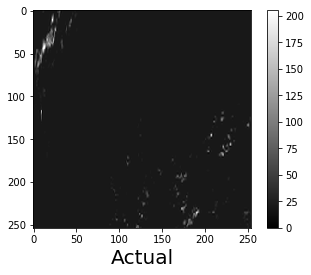

RMSE:  17.98119118430347



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017093016.npy


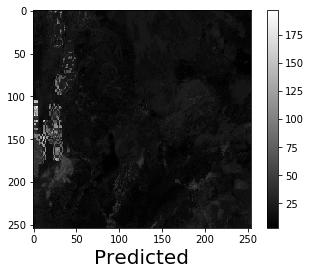

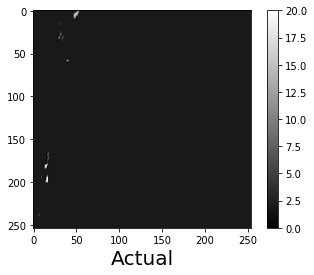

RMSE:  18.855079933749384



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017100118.npy


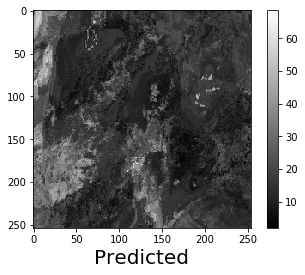

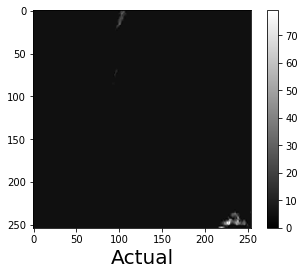

RMSE:  15.248059648743709



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017100119.npy


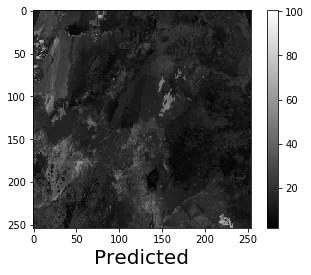

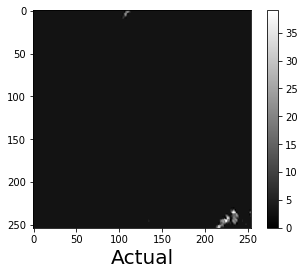

RMSE:  16.650683574572156



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017100120.npy


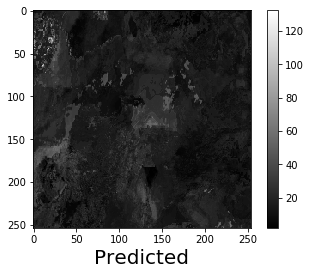

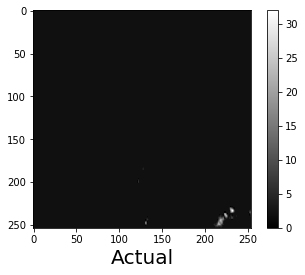

RMSE:  17.941782657950405



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017100616.npy


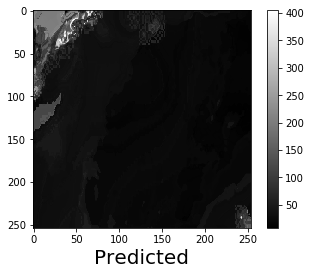

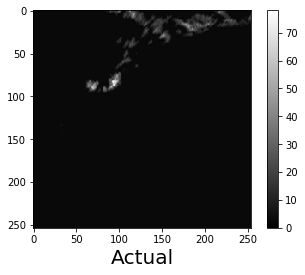

RMSE:  46.88379988451643



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017100618.npy


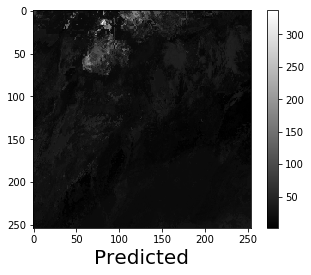

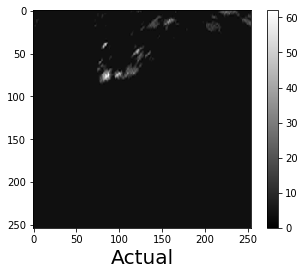

RMSE:  26.045436319718394



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017100619.npy


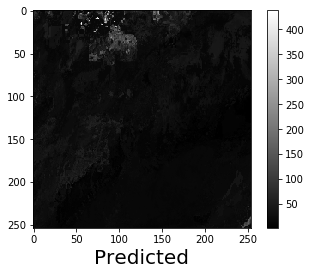

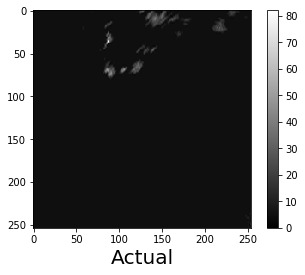

RMSE:  26.837326033607322



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017100620.npy


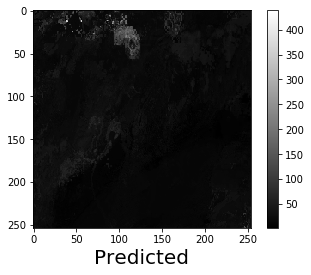

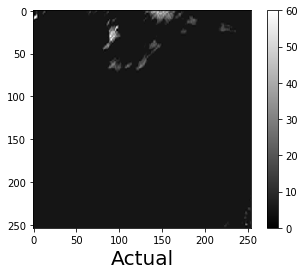

RMSE:  23.970091828163792



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017101418.npy


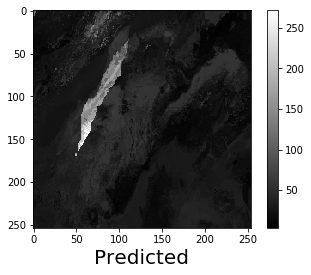

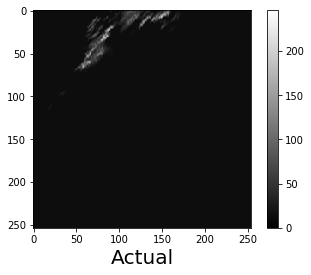

RMSE:  32.488145448366076



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017101419.npy


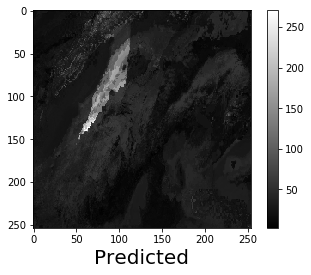

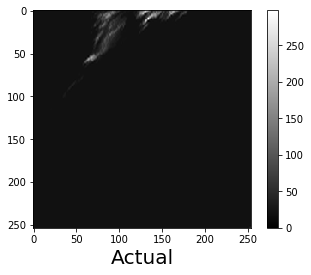

RMSE:  27.576437322010815



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017101420.npy


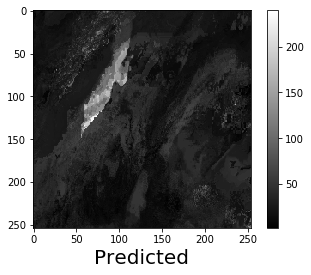

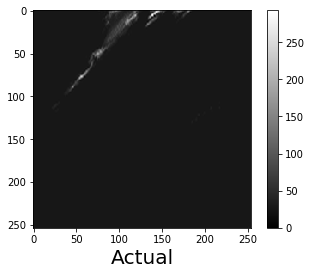

RMSE:  24.006861977439783



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017102119.npy


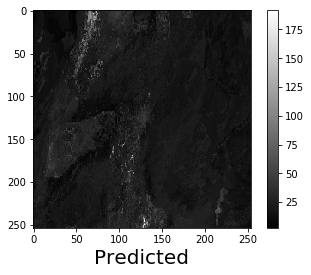

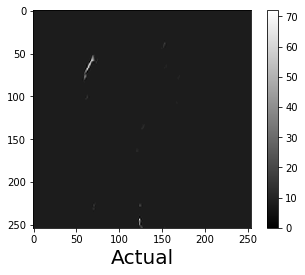

RMSE:  16.471039723566303



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017102120.npy


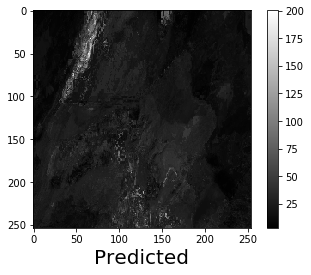

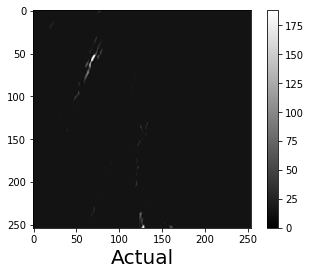

RMSE:  16.09100269283227



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017102820.npy


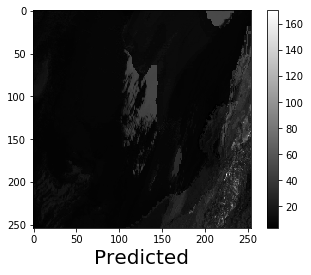

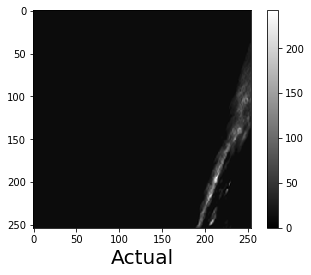

RMSE:  13.252959134353793



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017110519.npy


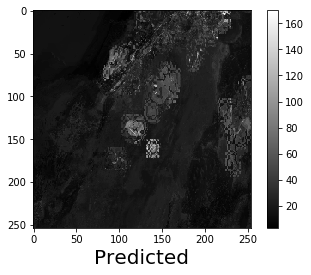

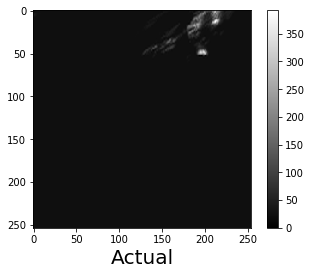

RMSE:  17.829527767698192



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017110520.npy


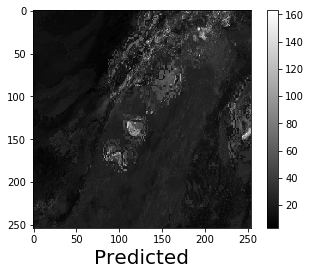

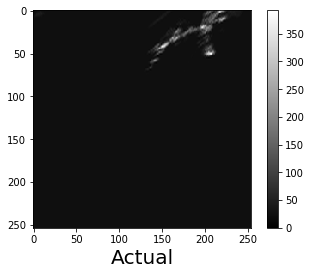

RMSE:  18.255113758707633



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017120818.npy


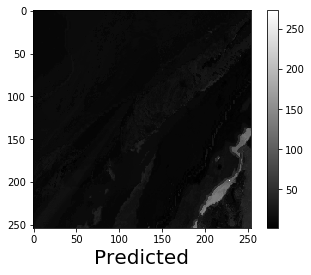

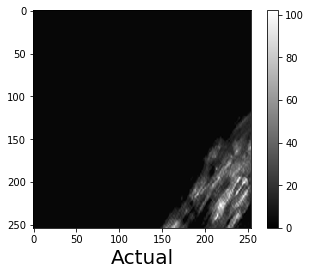

RMSE:  16.09359519149194



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017120819.npy


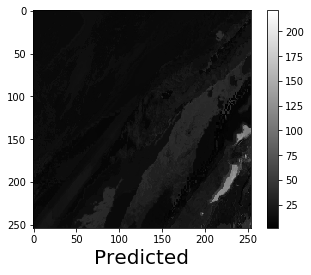

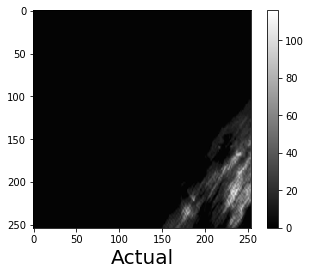

RMSE:  18.219241756904715



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017120820.npy


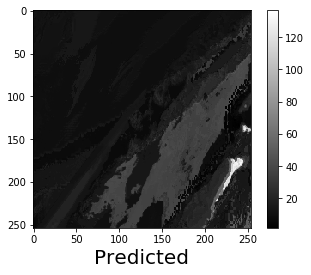

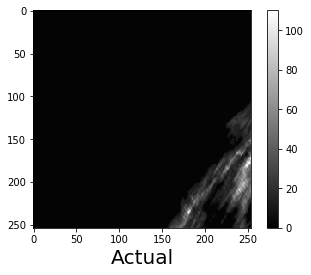

RMSE:  19.023194165776484





In [18]:
rmse_list = []
indexOf_least_rsme = 0;
least_rsme = 99999;
indexOf_largest_rsme = 0;
largest_rsme = 0;

for i in range(int(X_test.shape[0]/64516)):
    print(Sa1_files_test[i])
    in_ = X_test[64516*i:64516*(i+1)]
    out_ = loaded_model.predict(in_).reshape(254, 254)
    actual_ = y_test[64516*i:64516*(i+1)].reshape(254, 254)
    plt.xlabel('Predicted', fontsize=20)
    plt.imshow(out_, cmap="gray")
    plt.colorbar()
    plt.show()
    plt.xlabel('Actual', fontsize=20)
    plt.imshow(actual_, cmap="gray")
    plt.colorbar()
    plt.show()
    rsme_ = rmse(out_, actual_)
    
    print("RMSE: ", rsme_)
    print("\n\n")
    
    if(rsme_ < least_rsme):
        least_rsme = rsme_
        indexOf_least_rsme = i
        
    if(rsme_ > largest_rsme):
        largest_rsme = rsme_
        indexOf_largest_rsme = i
        
    print("====================================")

# Least RSME (Good)

../satyam_rad_sat_mod_npy/sa1_npy/sat.2017090919.npy


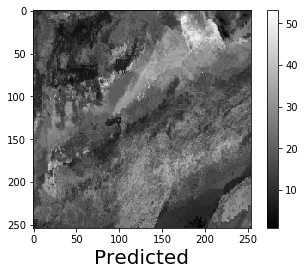

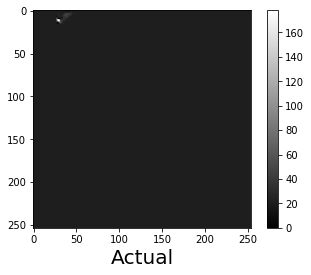

RMSE:  19.023194165776484





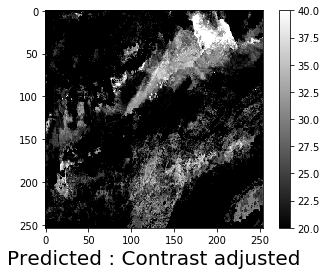

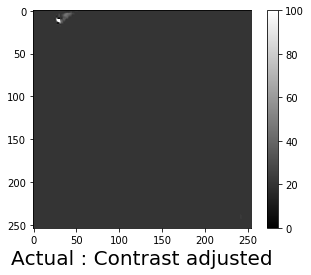

In [19]:
    i = indexOf_least_rsme

    print(Sa1_files_test[i])
    in_ = X_test[64516*i:64516*(i+1)]
    out_ = loaded_model.predict(in_).reshape(254, 254)
    actual_ = y_test[64516*i:64516*(i+1)].reshape(254, 254)
    plt.xlabel('Predicted', fontsize=20)
    plt.imshow(out_, cmap="gray")
    plt.colorbar()
    plt.show()
    plt.xlabel('Actual', fontsize=20)
    plt.imshow(actual_, cmap="gray")
    plt.colorbar()
    plt.show()
    print("RMSE: ", rsme_)
    print("\n\n")
    
    plt.imshow(out_, cmap='gray', vmin=20, vmax=40)
    plt.colorbar()
    plt.xlabel('Predicted : Contrast adjusted', fontsize=20)
    plt.show()
    
    plt.imshow(actual_, cmap='gray', vmin=0, vmax=100)
    plt.colorbar()
    plt.xlabel('Actual : Contrast adjusted', fontsize=20)
    plt.show()
    
    rsme_ = rmse(out_, actual_)

# Latgest RSME (Bad)

../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082219.npy


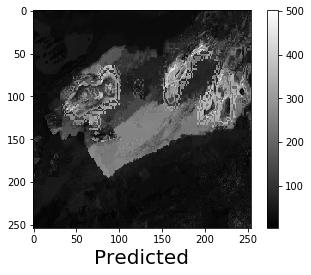

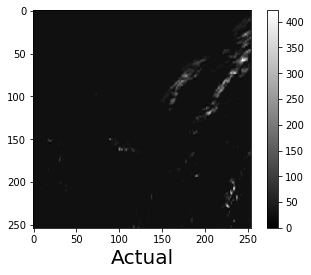

RMSE:  7.693245848279084





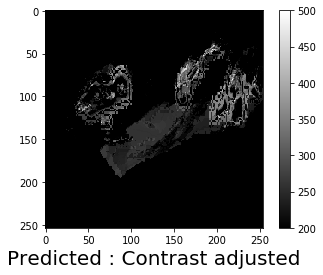

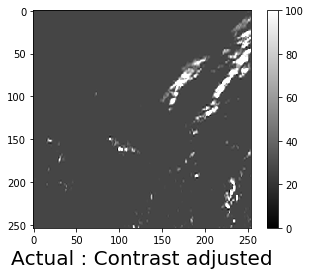

In [20]:
    i = indexOf_largest_rsme
    print(Sa1_files_test[i])
    in_ = X_test[64516*i:64516*(i+1)]
    out_ = loaded_model.predict(in_).reshape(254, 254)
    actual_ = y_test[64516*i:64516*(i+1)].reshape(254, 254)
    plt.xlabel('Predicted', fontsize=20)
    plt.imshow(out_, cmap="gray")
    plt.colorbar()
    plt.show()
    plt.xlabel('Actual', fontsize=20)
    plt.imshow(actual_, cmap="gray")
    plt.colorbar()
    plt.show()
    print("RMSE: ", rsme_)
    print("\n\n")
    
    plt.imshow(out_, cmap='gray', vmin=200, vmax=500)
    plt.colorbar()
    plt.xlabel('Predicted : Contrast adjusted', fontsize=20)
    plt.show()
    
    plt.imshow(actual_, cmap='gray', vmin=0, vmax=100)
    plt.colorbar()
    plt.xlabel('Actual : Contrast adjusted', fontsize=20)
    plt.show()
    
    rsme_ = rmse(out_, actual_)

In [21]:
# Confusion Matrix

In [22]:
real_flattened = y_test.flatten()
pred_flattened = loaded_model.predict(X_test).flatten()

In [23]:
thershold = np.mean(real_flattened) + 1 * np.std(real_flattened)
thershold

35.566750562574875

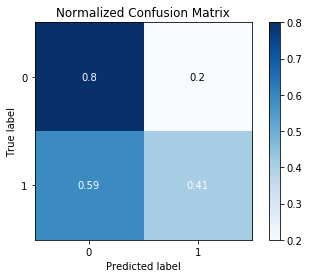

In [24]:
y_train_copy = np.copy(real_flattened)
y_train_copy[y_train_copy < thershold] = 0
y_train_copy[y_train_copy >= thershold] = 1

predictions_train_copy = np.copy(pred_flattened)
predictions_train_copy[predictions_train_copy < thershold] = 0
predictions_train_copy[predictions_train_copy >= thershold] = 1

skplt.metrics.plot_confusion_matrix(y_train_copy, predictions_train_copy, normalize=True)
plt.show()

In [25]:
from sklearn.metrics import confusion_matrix
FPR = []
TPR = []

for i in range(1, np.max(real_flattened), 10):
    y_train_copy = np.copy(real_flattened)
    y_train_copy[y_train_copy < i] = 0
    y_train_copy[y_train_copy >= i] = 1

    predictions_train_copy = np.copy(pred_flattened)
    predictions_train_copy[predictions_train_copy < i] = 0
    predictions_train_copy[predictions_train_copy >= i] = 1
    
    temp = confusion_matrix(y_train_copy, predictions_train_copy)
    
    TN = temp[0][0]
    FP = temp[0][1]
    FN = temp[1][0]
    TP = temp[1][1]
    
    TPR_ = TP/(TP+FN)
    FPR_ = FP/(TN+FP)
    
    FPR.append(FPR_)
    TPR.append(TPR_)

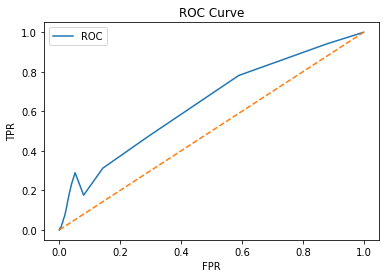

In [26]:
plt.plot(FPR, TPR, label='ROC')
plt.plot([0,1], [0,1], linestyle='dashed')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR");
plt.legend()